## Atividade 4

## Classificador de imagens de dia e noite


Utilizando o conjunto de imagens do dataset do projeto [AMOS](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes), construir um classificador de imagens que dado uma determinada imagem deverá ser capaz em classificar em _dia_ ou _noite_.

Para este modelo, será levado em consideração como principal característica seu respectivo valor de brilho.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

## 2. Principais atividades do _pipeline_

1. Normalizar
2. Extrair características
3. Construir classificador
4. Testar o modelo

*Adaptado deste [repositório](https://github.com/udacity/CVND_Exercises/blob/master/1_1_Image_Representation) de Visão Computacional da Udacity, de Cezanne Camacho.*

In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def carregar_arquivos(image_dir):
    
    im_list = []
    image_types = ["day", "night"]
    
    for im_type in image_types:
        
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            im = cv2.imread(file)
            
            if not im is None:
                im_list.append((im, im_type))
    
    return im_list

In [2]:
lista_imagens_teste = carregar_arquivos("imagens/test")
lista_imagens_treinamento = carregar_arquivos("imagens/training")

## 3. Normalização

Constuir uma função que receberá uma imagem e redimensionará para o tamanho 1000 x 600.
Vamos inspecionar algumas imagens.

Esta a seguir possui 700 de altura 1300 de comprimento.

Text(0.5, 1.0, 'night')

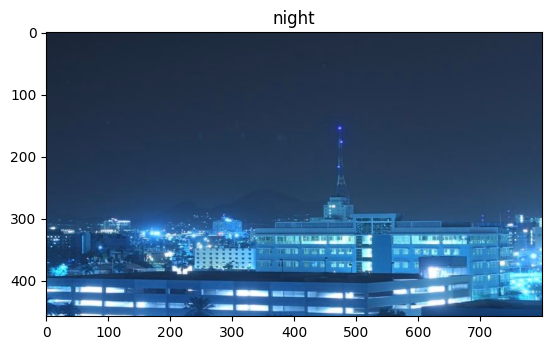

In [3]:
plt.imshow(lista_imagens_treinamento[200][0])
plt.title(lista_imagens_treinamento[200][1])

Já esta nova imagem é menor, possuindo 350 x 650 pixels.

Text(0.5, 1.0, 'day')

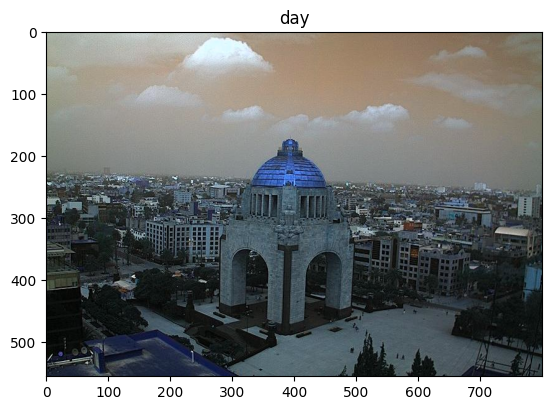

In [4]:
plt.imshow(lista_imagens_treinamento[0][0])
plt.title(lista_imagens_treinamento[0][1])

In [5]:
def padronizar_imagem(imagem):
    imagem_padrao = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    imagem_padrao = cv2.resize(imagem_padrao, (1000, 600), interpolation = cv2.INTER_LANCZOS4)
    return imagem_padrao

## 4. Extração de características

Para cada imagem analisada, extrair o componente de brilho médio associado.

In [6]:
def extracao_brilho_medio(imagem):
    media_brilho = []
    image_types = ["day", "night"]
    for im_type in image_types:
        for file in glob.glob(os.path.join(imagem, im_type, "*")):
            im = cv2.imread(file)
            if not im is None:
                im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                if im_gray.size > 0:
                    brilho_medio = np.mean(im_gray)
                    media_brilho.append((im_type, brilho_medio, im))
    return media_brilho


In [7]:
lista_imagens_teste = extracao_brilho_medio("imagens/test")
print(lista_imagens_teste[0][1])


120.35750892857143


Agora vamos construir uma lista com todas as imagens e seus brilhos médios extraídos. Vamos também rotular as imagens utilizando hot-enconding, sendo 1 para dia e 0 para noite.

In [8]:
def encode(label):
    numero_val = 0
    if(label == 'day'):
        numero_val = 1
    
    return numero_val

In [29]:
def extrair_caracteristica_imagem(lista_imagem):
    lista_imagem_padrao = []
    image_types = ["day", "night"]
    for im_type in image_types:
        for file in glob.glob(os.path.join(lista_imagem, im_type, "*")):
            im = cv2.imread(file)
            if not im is None:
                im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                if im_gray.size > 0:
                    brilho_medio = np.mean(im_gray)
                    label = encode(im_type)
                    lista_imagem_padrao.append((brilho_medio, label, im))
    return lista_imagem_padrao


In [32]:
lista_padronizada_treinamento = extrair_caracteristica_imagem("imagens/training")
lista_padronizada_teste = extrair_caracteristica_imagem("imagens/test")

# printando as 5 primeiras linhas do conjunto de treinamento para verificar as alterações
print('                   TREINAMENTO')
for i in range(5):
    print(f"Imagem {i}: Brilho = {lista_padronizada_treinamento[i][0]}, Label = {lista_padronizada_treinamento[i][1]}")

print('\n                   TESTE')  
# printando as 5 primeiras linhas do conjunto de teste para verificar as alterações
for i in range(5):
    print(f"Imagem {i}: Brilho = {lista_padronizada_teste[i][0]}, Label = {lista_padronizada_teste[i][1]}")


                   TREINAMENTO
Imagem 0: Brilho = 96.53877927927928, Label = 1
Imagem 1: Brilho = 111.39482924107143, Label = 1
Imagem 2: Brilho = 102.6767558352081, Label = 1
Imagem 3: Brilho = 162.82175218340612, Label = 1
Imagem 4: Brilho = 103.1806303304904, Label = 1

                   TESTE
Imagem 0: Brilho = 120.35750892857143, Label = 1
Imagem 1: Brilho = 124.78392714968153, Label = 1
Imagem 2: Brilho = 153.85162225042302, Label = 1
Imagem 3: Brilho = 97.21563738738739, Label = 1
Imagem 4: Brilho = 102.1708063063063, Label = 1


Testando a rotulação de imagem e padronização.

Text(0.5, 1.0, 'day')

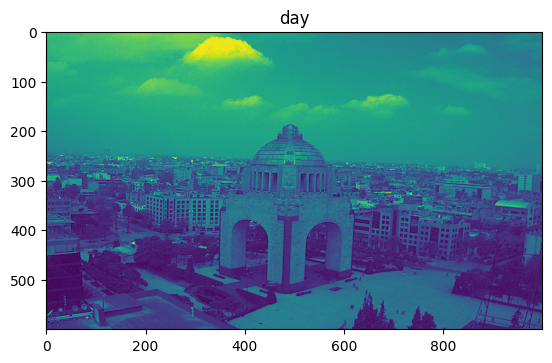

In [33]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[0][0]))
plt.title(lista_imagens_treinamento[0][1])

Text(0.5, 1.0, '0')

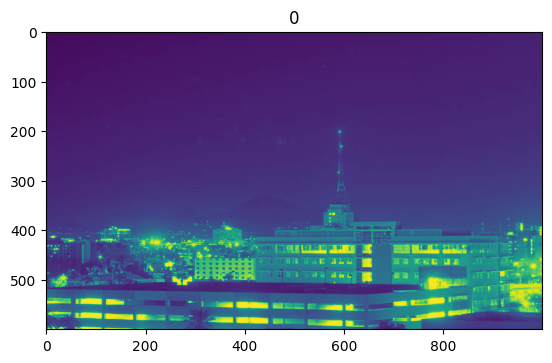

In [34]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[200][0]))
plt.title(lista_padronizada_treinamento[200][1])

Obtendo as características de ambos os grupos de imagens, treinamento e testes.

## 5. Construção do classificador

Desenvolver um modelo de aprendizado de máquina que seja capaz de classificar adequadamente, com no mínimo 90% de acurácia, as imagens que representam o dia e a noite.

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

classificador_decision_tree = DecisionTreeClassifier(random_state=0)

A função a seguir é para padronizar a forma que o ``ScikitLearn`` obtém os dados, separando o que é classe (Y) do que é feature (X).

In [36]:
def definicao_feature_class(lista_padronizada):
    X = []
    Y = []

    for item in lista_padronizada:
        X.append(item[0])
        Y.append(item[1])

    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)

    return X, Y

In [37]:
X, Y = definicao_feature_class(lista_padronizada_treinamento)

In [38]:
classificador_decision_tree.fit(X, Y)

DecisionTreeClassifier(random_state=0)

Testando algumas classificações.

Text(0.5, 1.0, 'day')

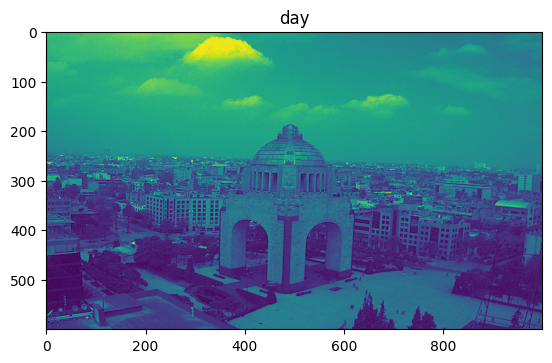

In [39]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[0][0]))
plt.title(lista_imagens_treinamento[0][1])

Text(0.5, 1.0, 'night')

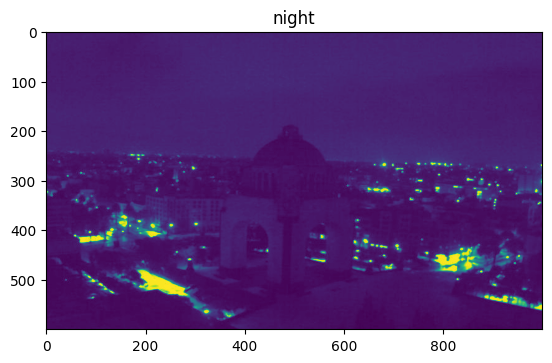

In [40]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[150][0]))
plt.title(lista_imagens_treinamento[150][1])

## 6. Teste do modelo

Dado o conjunto de testes, verificar a acurácia do modelo.

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_test, Y_test = definicao_feature_class(lista_padronizada_teste)
Y_pred = classificador_decision_tree.predict(X_test)

## 6.1 Precisão

Calcular a precisão do modelo com base os dados de teste.

In [45]:
# Calculando a acuracia das previsões
accuracy = accuracy_score(Y_test, Y_pred)

# printando a acuracia
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.96


## 6.2 Matriz de confusão

Calcular a matriz de confusão do modelo, levando em consideração os dados de teste.

<Axes: >

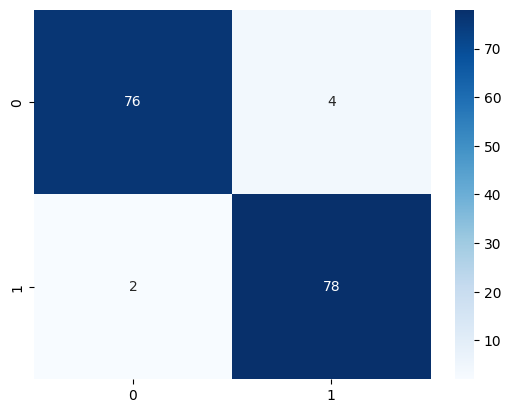

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# definindo os dados de teste
X_test, Y_test = definicao_feature_class(lista_padronizada_teste)

# Usando o classificador treinado para as previsões
Y_pred = classificador_decision_tree.predict(X_test)

# Calculando a matriz de confusao para as previsões
cm = confusion_matrix(Y_test, Y_pred)

# plotando a matrix de confusao
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')